<a href="https://colab.research.google.com/github/JulianDR26/Se-ales-y-Sistemas-2024-1S/blob/main/EXAMEN_3_SYS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SOLUCIÓN EXAMEN 3 SEÑALES Y SISTEMAS

##LIBRERIAS A IMPORTAR PARA EL FUNCIONAMIENTO DE TODO EL CODIGO

In [3]:
!pip install streamlit -q   # El comando pip install streamlit -q se utiliza para instalar el paquete Streamlit ya que no viene por defecto en python
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz
!pip install soundfile

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 5.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached certifi-2024.8.30-py3-none-any.whl.metadata (2.2 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached urllib3-2.2.3-py3-none-any.whl.metadata (6.5 kB)
  Using cached charset_normalizer-3.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (33 kB)
  U

##PUNTO 1

Para el desarrollo teorico del punto 1 del sistema masa resorte con amortiguamiento se realiza el proceso en el respectivo pdf en donde se detalla esa situación.

In [11]:

# ESTRUCTURA DEL CODIGO:
# MOSTRAR LA PARTE MATEMATICA CON SYMPY
# DECUERDO A ESO PEDIRLE AL USUARIO UN VALOR DE CHI PARA MOSTRAR LOS TIPOS DE AMORTIGUAMIENTO
# MOSTRARÁ LAS GRAFICAS PERMITENENTES DEL SLIT Y LOS RESPECTIVOS VALORES DE C,M,K Y SU EQUIVALENTE EN RLC

#========= DE MANERA GENERAL MOSTRARÁ EL SLIT MASA RESORTE ========================#
# LA IDEA ES CON STREAMLIT PUEDA MOSTRAR LA IMAGEN DEL SLIT MASA RESORTE AL USUARIO, Y LA IMAGEN DEL SLIT RLC EN CUESTION


Ingrese el valor de la constante canónica generalizada de amortiguamiento (b) o Chi: 0.2
Ecuación diferencial:
                         2       
  d                     d        
c⋅──(x(t)) + k⋅x(t) + m⋅───(x(t))
  dt                      2      
                        dt       



Solución de la ecuación diferencial:
             ⎛        ____________⎞          ⎛       ____________⎞ 
             ⎜       ╱  2         ⎟          ⎜      ╱  2         ⎟ 
           t⋅⎝-c + ╲╱  c  - 4⋅k⋅m ⎠       -t⋅⎝c + ╲╱  c  - 4⋅k⋅m ⎠ 
           ────────────────────────       ─────────────────────────
                     2⋅m                             2⋅m           
x(t) = C₁⋅ℯ                         + C₂⋅ℯ                         

Función de transferencia H(s):
      k       
──────────────
             2
c⋅s + k + m⋅s 

Función de transferencia H(s) con valores específicos:
        4.0         
────────────────────
     2              
1.0⋅s  + 0.8⋅s + 4.0

Ceros de la función de transferencia:


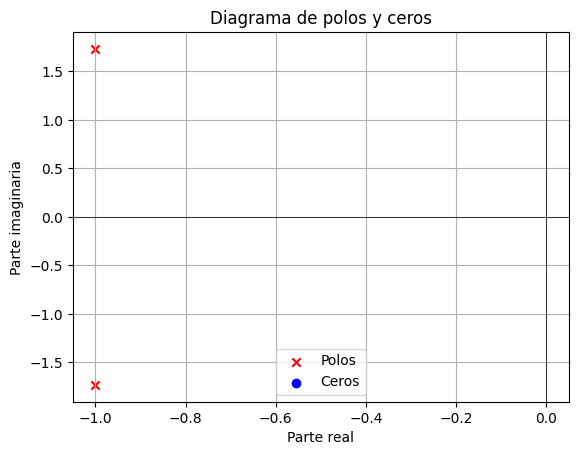

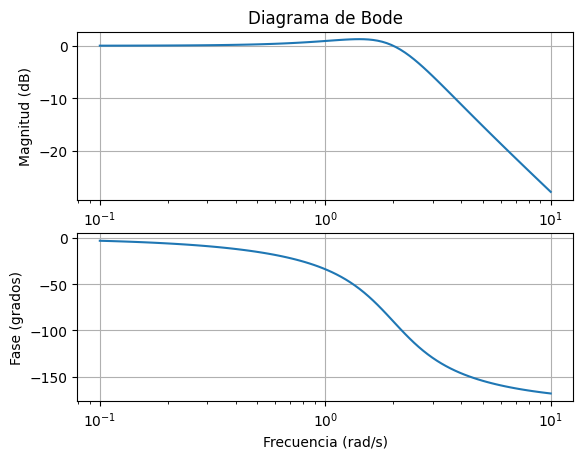

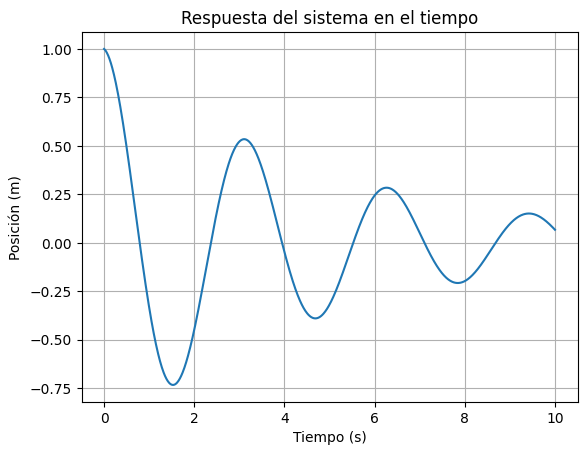

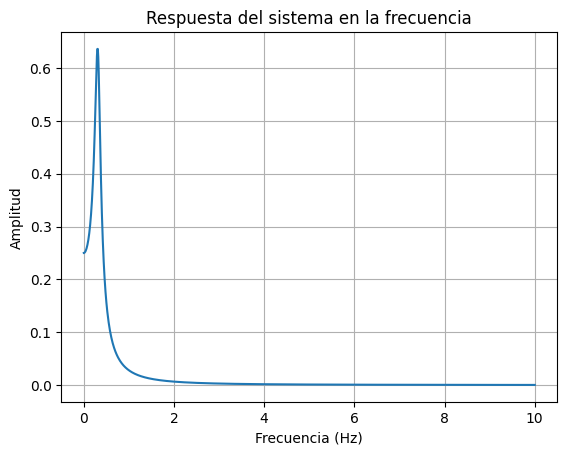


Valores equivalentes del circuito RLC en serie:
Resistencia (R): 0.80 Ohm
Inductancia (L): 1.00 H
Capacitancia (C): 0.25 F


In [13]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Definir variables simbólicas
t, m, k, c, b = sp.symbols('t m k c b')

# Constante canónica generalizada de amortiguamiento (entrada del usuario)
Chi_valor = float(input("Ingrese el valor de la constante canónica generalizada de amortiguamiento (b) o Chi: "))

# Valores arbitrarios para masa y constante de resorte
m_valor = 1.0  # kg
k_valor = 4.0  # N/m

# Calcular constante de fricción
c_valor = 2 * Chi_valor * np.sqrt(m_valor * k_valor)

# Definición de la ecuación diferencial del sistema masa-resorte con amortiguamiento
x = sp.Function('x')(t)
eq = m * sp.diff(x, t, t) + c * sp.diff(x, t) + k * x

# Mostrar la ecuación diferencial
print("Ecuación diferencial:")
sp.pprint(eq)

print("\n")
# Resolver la ecuación diferencial
sol = sp.dsolve(eq, x)

# Mostrar la solución de la ecuación diferencial
print("\nSolución de la ecuación diferencial:")
sp.pprint(sol)

# Función de transferencia H(s)
s = sp.symbols('s')
H = k / (m * s**2 + c * s + k)

# Mostrar la función de transferencia
print("\nFunción de transferencia H(s):")
sp.pprint(H)

# Sustituyendo los valores de m, c y k
H_substituted = H.subs({m: m_valor, c: c_valor, k: k_valor})

# Mostrar la función de transferencia con valores específicos
print("\nFunción de transferencia H(s) con valores específicos:")
sp.pprint(H_substituted)

# Crear el sistema usando scipy
sistema = signal.TransferFunction(num, den)

# Polos y ceros
zeros = sp.solve(sp.numer(H_substituted), s)
poles = sp.solve(sp.denom(H_substituted), s)

# Mostrar polos y ceros
print("\nCeros de la función de transferencia:")
sp.pprint(zeros)
print("\nPolos de la función de transferencia:")
sp.pprint(poles)

# Análisis de tipo de amortiguamiento
if Chi_valor < 0 :
    print("El sistema es INESTABLE, Posee polos en el lado derecho del plano complejo S.")
elif Chi_valor == 0:
    print("El sistema es OSCILATORIO.")
elif 0 < Chi_valor < 1 :
    print("El sistema es SUBAMORTIGUADO")
elif Chi_valor == 1:
    print("El sistema es CRITICAMENTE AMORTIGUADO")
else:
    print("El sistema está SOBREAMORTIGUADO.")

# Gráfica de polos y ceros
plt.figure()
zeros, poles, gain = signal.tf2zpk(num, den)
plt.scatter(np.real(poles), np.imag(poles), marker='x', color='r', label='Polos')
plt.scatter(np.real(zeros), np.imag(zeros), marker='o', color='b', label='Ceros')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.title('Diagrama de polos y ceros')
plt.xlabel('Parte real')
plt.ylabel('Parte imaginaria')
plt.grid(True)
plt.legend()
plt.show()

# Grafica de Diagrama de Bode
w, mag, phase = signal.bode(sistema)

plt.figure()
plt.subplot(2, 1, 1)
plt.semilogx(w, mag)
plt.title('Diagrama de Bode')
plt.ylabel('Magnitud (dB)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.semilogx(w, phase)
plt.xlabel('Frecuencia (rad/s)')
plt.ylabel('Fase (grados)')
plt.grid(True)
plt.show()

# Gráfica de la respuesta del sistema en el tiempo
t_valores = np.linspace(0, 10, 1000)
x_valores = np.exp(-Chi_valor * t_valores) * np.cos(np.sqrt(k_valor / m_valor - Chi_valor**2) * t_valores)
plt.plot(t_valores, x_valores)
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición (m)')
plt.title('Respuesta del sistema en el tiempo')
plt.grid()
plt.show()

# Gráfica de la respuesta del sistema en la frecuencia
f_valores = np.linspace(0, 10, 1000)
X_valores = 1 / np.sqrt((k_valor - m_valor * (2 * np.pi * f_valores)**2)**2 + (c_valor * 2 * np.pi * f_valores)**2)
plt.plot(f_valores, X_valores)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('Respuesta del sistema en la frecuencia')
plt.grid()
plt.show()

# Valores equivalentes del circuito RLC en serie
R = c_valor
L = m_valor
C = 1 / k_valor

# Mostrar valores equivalentes
print("\nValores equivalentes del circuito RLC en serie:")
print(f"Resistencia (R): {R:.2f} Ohm")
print(f"Inductancia (L): {L:.2f} H")
print(f"Capacitancia (C): {C:.2f} F")

In [15]:
%%writefile punto_1ex3.py
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import sympy as sp

# Título del dashboard
st.title("Simulación de Sistema Masa-Resorte-Amortiguador")

# Entrada del usuario: valor del factor de amortiguamiento
b_valor = st.number_input("Ingrese el valor del factor de amortiguamiento (b)", value=0.5)

# Parámetros del sistema
m_valor = 1.0  # kg, masa
k_valor = 4.0  # N/m, constante de resorte
c_valor = 2 * b_valor * np.sqrt(m_valor * k_valor)  # c = 2 * b * sqrt(m * k)

# Mostrar el tipo de amortiguamiento
if b_valor < 1:
    st.write("El sistema es **subamortiguado**.")
elif b_valor == 1:
    st.write("El sistema está **críticamente amortiguado**.")
else:
    st.write("El sistema está **sobreamortiguado**.")

# Función de transferencia en términos de Scipy para graficar Bode
num = [k_valor]
den = [m_valor, c_valor, k_valor]
sys = signal.TransferFunction(num, den)

# Gráfica de Bode
st.write("### Diagrama de Bode")
w, mag, phase = signal.bode(sys)

fig_bode, ax_bode = plt.subplots(2, 1, figsize=(8, 6))
ax_bode[0].semilogx(w, mag)
ax_bode[0].set_title('Magnitud')
ax_bode[0].set_ylabel('Magnitud (dB)')
ax_bode[0].grid(True)

ax_bode[1].semilogx(w, phase)
ax_bode[1].set_title('Fase')
ax_bode[1].set_xlabel('Frecuencia (rad/s)')
ax_bode[1].set_ylabel('Fase (grados)')
ax_bode[1].grid(True)

st.pyplot(fig_bode)

# Respuesta al impulso
st.write("### Respuesta al Impulso")
t_imp, y_imp = signal.impulse(sys)
fig_impulse, ax_impulse = plt.subplots()
ax_impulse.plot(t_imp, y_imp)
ax_impulse.set_title("Respuesta al Impulso")
ax_impulse.set_xlabel("Tiempo (s)")
ax_impulse.set_ylabel("Amplitud")
ax_impulse.grid(True)

st.pyplot(fig_impulse)

Writing punto_1ex3.py


In [20]:
!streamlit run punto_1ex3.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.95.32:8501

  Stopping...
^C


##PUNTO 2

1.25


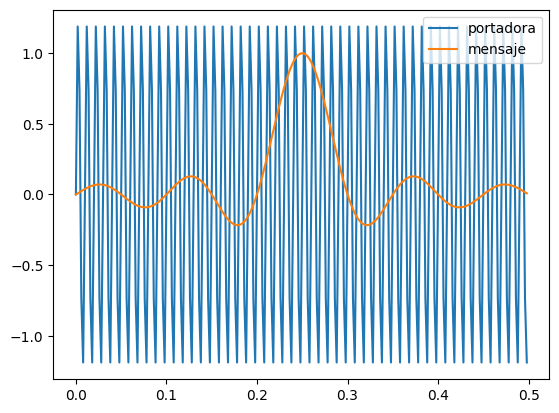

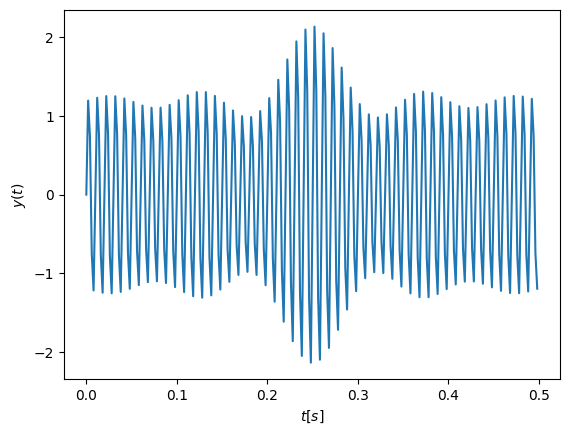

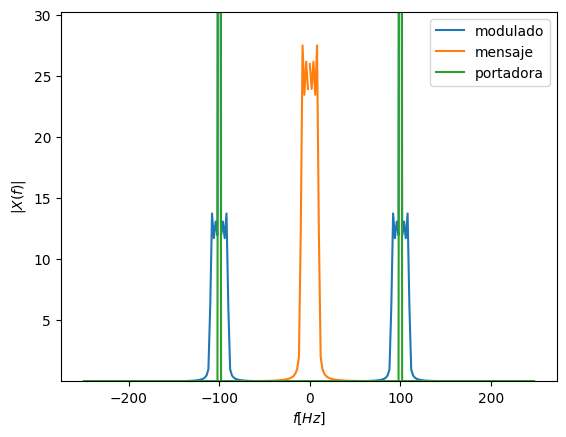

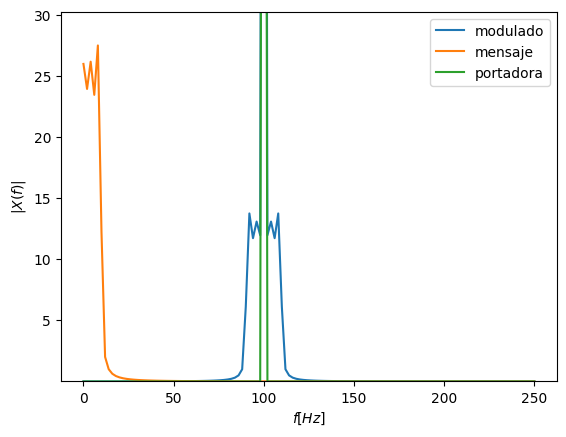

In [21]:
#============== AHORA VIENE EL SISTEMA DE MODULACIÓN AM Y DEMODULACIÓN =============

import numpy as np
import matplotlib.pyplot as plt
#Frecuencia portadora y muestreo

Fc = 100 #frecuencia de portadora

Fm = 10 #frecuencia del mensaje
Am = 1 #amplitud del mensaje


ti = 0
tf = 5/Fm #cantidad de periodos a graficar de la

Fs = 5*Fc #frecuencia muestreo

t = np.arange(ti,tf,1/Fs) #vector del tiempo
m = Am*np.sinc(2*np.pi*Fm*(t-0.5*tf)/np.pi)#Am*np.cos(2*np.pi*Fm*t) #mensaje #

Im = 0.8 # Im = peak(m(t))/Ac ->  Ac = peak(m(t))/Im

Ac = max(abs(m))/Im #amplitud de la portadora según índice de modulación
c = Ac*np.sin(2*np.pi*Fc*t) #portadora
print(Ac)

plt.plot(t,c,label='portadora')
plt.plot(t,m,label='mensaje')
plt.legend()
plt.show()

y = (1+m/Ac)*c #señal modulada en AM

plt.plot(t,y)
plt.xlabel('$t[s]$')
plt.ylabel('$y(t)$')
plt.show()

Xfc = np.fft.fft(c)
Xfm = np.fft.fft(m)
Xfy = np.fft.fft(y)

vfre = np.fft.fftfreq(len(c),1/Fs)

plt.plot(vfre,abs(Xfy),label='modulado')
plt.plot(vfre,abs(Xfm),label='mensaje')
plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
plt.show()

Xfc = np.fft.rfft(c)
Xfm = np.fft.rfft(m)
Xfy = np.fft.rfft(y)

vfre = np.fft.rfftfreq(len(c),1/Fs)

plt.plot(vfre,abs(Xfy),label='modulado')
plt.plot(vfre,abs(Xfm),label='mensaje')
plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
plt.show()



Ahora se viene la creación

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, ifft
from scipy.signal import butter, lfilter, freqz, bode, zpk2tf, tf2zpk
from scipy.io import wavfile, write
from IPython.display import Audio

# 1. Modulación AM (ya vista previamente)
# Reutilizamos el código de modulación anterior, donde ya hemos modulado la señal.

# Parámetros del filtro digital pasa-bajas
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs  # Frecuencia de Nyquist
    normal_cutoff = cutoff / nyq  # Normalización de la frecuencia
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# Aplicar el filtro pasa-bajas
def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Diseño del filtro
cutoff = 3000  # Frecuencia de corte en Hz
order = 4  # Orden del filtro
fs = samplerate  # Frecuencia de muestreo (obtenida del archivo de audio)

# 2. Demodulación AM
# Etapa de rectificación (detector de envolvente)
rectified_signal = np.abs(y_t)

# Aplicar filtro pasa-bajas para recuperar la señal mensaje
demodulated_signal = butter_lowpass_filter(rectified_signal, cutoff, fs, order)

# 3. Gráfica de polos y ceros del filtro pasa-bajas
b, a = butter_lowpass(cutoff, fs, order)
z, p, k = tf2zpk(b, a)

plt.figure()
plt.scatter(np.real(z), np.imag(z), s=50, facecolors='none', edgecolors='r', label='Ceros')
plt.scatter(np.real(p), np.imag(p), s=50, facecolors='none', edgecolors='b', label='Polos')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.title('Polos y Ceros del Filtro Pasa-Bajas')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginaria')
plt.grid(True)
plt.legend()
plt.show()

# 4. Diagrama de Bode del filtro
w, h = freqz(b, a, worN=8000)
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.title('Diagrama de Bode del Filtro Pasa-Bajas')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Ganancia')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(0.5*fs*w/np.pi, np.angle(h), 'g')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Fase (radianes)')
plt.grid()
plt.show()

# 5. Graficar señales en tiempo (modulada, rectificada, demodulada)
plt.figure(figsize=(10, 8))

# Señal Modulada
plt.subplot(3, 1, 1)
plt.plot(t, y_t)
plt.title("Señal Modulada AM (Tiempo)")
plt.grid()

# Señal Rectificada (demodulación)
plt.subplot(3, 1, 2)
plt.plot(t, rectified_signal)
plt.title("Señal Rectificada (Tiempo)")
plt.grid()

# Señal Demodulada
plt.subplot(3, 1, 3)
plt.plot(t, demodulated_signal)
plt.title("Señal Demodulada (Tiempo)")
plt.grid()

plt.tight_layout()
plt.show()

# Guardar y reproducir señales de la etapa de demodulación
wavfile.write("song_demodulated.wav", samplerate, demodulated_signal.astype(np.int16))

# Reproducir señal demodulada
print("Reproduciendo señal demodulada...")
Audio("song_demodulated.wav")

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, ifft
from scipy.signal import butter, lfilter, freqz, bode, zpk2tf, tf2zpk
from scipy.io import wavfile
from IPython.display import Audio
import yt_dlp as youtube_dl

# 1. Descargar el fragmento de la canción
def download_ytvid_as_mp3(video_url, name):
    video_info = youtube_dl.YoutubeDL().extract_info(url=video_url, download=False)
    filename = f"{name}.mp3"
    options = {
        'format': 'bestaudio/best',
        'keepvideo': False,
        'outtmpl': filename,
    }

    with youtube_dl.YoutubeDL(options) as ydl:
        ydl.download([video_info['webpage_url']])

    return filename

# Cambia la URL por la de tu canción favorita
song_filename = download_ytvid_as_mp3("https://youtu.be/8yy2K5DsQHg?si=qLK2vbJiP0Mozop4", "salsa1")

# Cargar el archivo de audio con una frecuencia de muestreo de 48 kHz
samplerate = 48000  # Frecuencia de muestreo
data, _ = wavfile.read(song_filename)
data = data[:, 0] if data.ndim > 1 else data  # Convertir a mono si es estéreo

# Tomar los primeros 5 segundos
n_seconds = 5
data = data[:samplerate * n_seconds]

# Normalizar la señal de audio
m_t = data / np.max(np.abs(data))

# 2. Definir la señal portadora
A_c = 1
F_c = 10000  # Frecuencia de la portadora en Hz
t = np.linspace(0, n_seconds, len(m_t), endpoint=False)  # Generar tiempo
c_t = A_c * np.sin(2 * np.pi * F_c * t)

# 3. Modulación AM
y_t = (1 + m_t) * c_t

# 4. Filtro Pasa-bajas Digital
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Diseño del filtro
cutoff = 3000  # Frecuencia de corte en Hz
order = 4  # Orden del filtro

# 5. Demodulación AM
# Rectificación
rectified_signal = np.abs(y_t)

# Aplicar filtro pasa-bajas para recuperar la señal mensaje
demodulated_signal = butter_lowpass_filter(rectified_signal, cutoff, samplerate, order)

# 6. Polos y ceros del filtro
b, a = butter_lowpass(cutoff, samplerate, order)
z, p, k = tf2zpk(b, a)

plt.figure()
plt.scatter(np.real(z), np.imag(z), s=50, facecolors='none', edgecolors='r', label='Ceros')
plt.scatter(np.real(p), np.imag(p), s=50, facecolors='none', edgecolors='b', label='Polos')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.title('Polos y Ceros del Filtro Pasa-Bajas')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginaria')
plt.grid(True)
plt.legend()
plt.show()

# 7. Diagrama de Bode del filtro
w, h = freqz(b, a, worN=8000)
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(0.5*samplerate*w/np.pi, np.abs(h), 'b')
plt.title('Diagrama de Bode del Filtro Pasa-Bajas')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Ganancia')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(0.5*samplerate*w/np.pi, np.angle(h), 'g')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Fase (radianes)')
plt.grid()
plt.show()

# 8. Graficar señales en el dominio del tiempo
plt.figure(figsize=(10, 8))

# Señal Modulada
plt.subplot(3, 1, 1)
plt.plot(t, y_t)
plt.title("Señal Modulada AM (Tiempo)")
plt.grid()

# Señal Rectificada
plt.subplot(3, 1, 2)
plt.plot(t, rectified_signal)
plt.title("Señal Rectificada (Tiempo)")
plt.grid()

# Señal Demodulada
plt.subplot(3, 1, 3)
plt.plot(t, demodulated_signal)
plt.title("Señal Demodulada (Tiempo)")
plt.grid()

plt.tight_layout()
plt.show()

# 9. Guardar y reproducir la señal demodulada
wavfile.write("song_demodulated.wav", samplerate, demodulated_signal.astype(np.int16))

# Reproducir señal demodulada
print("Reproduciendo señal demodulada...")
Audio("song_demodulated.wav")

[youtube] Extracting URL: https://youtu.be/8yy2K5DsQHg?si=qLK2vbJiP0Mozop4
[youtube] 8yy2K5DsQHg: Downloading webpage
[youtube] 8yy2K5DsQHg: Downloading ios player API JSON
[youtube] 8yy2K5DsQHg: Downloading web creator player API JSON
[youtube] 8yy2K5DsQHg: Downloading player bbc52cb2
[youtube] 8yy2K5DsQHg: Downloading m3u8 information
[youtube] Extracting URL: https://www.youtube.com/watch?v=8yy2K5DsQHg
[youtube] 8yy2K5DsQHg: Downloading webpage
[youtube] 8yy2K5DsQHg: Downloading ios player API JSON
[youtube] 8yy2K5DsQHg: Downloading web creator player API JSON
[youtube] 8yy2K5DsQHg: Downloading m3u8 information
[info] 8yy2K5DsQHg: Downloading 1 format(s): 251
[download] Destination: salsa1.mp3
[download] 100% of    2.84MiB in 00:00:00 at 7.03MiB/s   


ValueError: File format b'\x1aE\xdf\xa3' not understood. Only 'RIFF' and 'RIFX' supported.

Ocurrió un error al descargar el video: 'key'


LibsndfileError: Error opening 'salsa1.mp3': File does not exist or is not a regular file (possibly a pipe?).

In [12]:
!pip install numpy matplotlib scipy yt-dlp soundfile

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz, tf2zpk
import yt_dlp
import soundfile as sf
import os

# 1. Descargar el fragmento de la canción
def download_ytvid_as_mp3(video_url, name):
    options = {
        'format': 'bestaudio/best',
        'postprocessors': [{
            'type': 'audiofile',
            'preferredcodec': 'mp3',
            'preferredquality': '192',
        }],
        'outtmpl': f"{name}.%(ext)s",  # Guarda como mp3
        'noplaylist': True,  # Descargar solo un video, no una lista de reproducción
    }

    with yt_dlp.YoutubeDL(options) as ydl:
        try:
            ydl.download([video_url])
            print(f"Descarga completada: {name}.mp3")
        except Exception as e:
            print(f"Error durante la descarga: {e}")

    # Verificar si el archivo fue creado
    mp3_filename = f"{name}.mp3"
    if not os.path.exists(mp3_filename):
        raise FileNotFoundError(f"El archivo {mp3_filename} no fue encontrado.")

    return mp3_filename

# Cambia la URL por la de tu canción favorita
video_url = "https://youtu.be/8yy2K5DsQHg?si=qLK2vbJiP0Mozop4"  # URL del video de YouTube
song_filename = download_ytvid_as_mp3(video_url, "panteramambo")

# Convertir a WAV usando soundfile
wav_filename = song_filename.replace(".mp3", ".wav")
data, samplerate = sf.read(song_filename)
sf.write(wav_filename, data, samplerate)

# Cargar el archivo de audio WAV
data, samplerate = sf.read(wav_filename)

# Comprobar que el archivo tiene suficientes datos
if len(data) < samplerate * 5:
    raise ValueError("El archivo de audio no tiene suficientes datos para 5 segundos.")

data = data[:, 0] if data.ndim > 1 else data  # Convertir a mono si es estéreo

# Tomar los primeros 5 segundos
n_seconds = 5
data = data[:samplerate * n_seconds]

# Normalizar la señal de audio
m_t = data / np.max(np.abs(data))

# 2. Definir la señal portadora
A_c = 1
F_c = 10000  # Frecuencia de la portadora en Hz
t = np.linspace(0, n_seconds, len(m_t), endpoint=False)  # Generar tiempo
c_t = A_c * np.sin(2 * np.pi * F_c * t)

# 3. Modulación AM
y_t = (1 + m_t) * c_t

# 4. Filtro Pasa-bajas Digital
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Diseño del filtro
cutoff = 3000  # Frecuencia de corte en Hz
order = 4  # Orden del filtro

# 5. Demodulación AM
# Rectificación
rectified_signal = np.abs(y_t)

# Aplicar filtro pasa-bajas para recuperar la señal mensaje
demodulated_signal = butter_lowpass_filter(rectified_signal, cutoff, samplerate, order)

# 6. Polos y ceros del filtro
b, a = butter_lowpass(cutoff, samplerate, order)
z, p, k = tf2zpk(b, a)

plt.figure()
plt.scatter(np.real(z), np.imag(z), s=50, facecolors='none', edgecolors='r', label='Ceros')
plt.scatter(np.real(p), np.imag(p), s=50, facecolors='none', edgecolors='b', label='Polos')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Polos y Ceros del Filtro Pasa-Bajas')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginaria')
plt.grid(True)
plt.legend()
plt.show()

# 7. Diagrama de Bode del filtro
w, h = freqz(b, a, worN=8000)
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(0.5 * samplerate * w / np.pi, np.abs(h), 'b')
plt.title('Diagrama de Bode del Filtro Pasa-Bajas')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Ganancia')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(0.5 * samplerate * w / np.pi, np.angle(h), 'g')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Fase (radianes)')
plt.grid()
plt.show()

# 8. Graficar señales en el dominio del tiempo
plt.figure(figsize=(10, 8))

# Señal Modulada
plt.subplot(3, 1, 1)
plt.plot(t, y_t)
plt.title("Señal Modulada AM (Tiempo)")
plt.grid()

# Señal Rectificada
plt.subplot(3, 1, 2)
plt.plot(t, rectified_signal)
plt.title("Señal Rectificada (Tiempo)")
plt.grid()

# Señal Demodulada
plt.subplot(3, 1, 3)
plt.plot(t, demodulated_signal)
plt.title("Señal Demodulada (Tiempo)")
plt.grid()

plt.tight_layout()
plt.show()

# 9. Guardar y reproducir la señal demodulada
sf.write("song_demodulated.wav", demodulated_signal, samplerate)

# Mensaje de finalización
print("Señal demodulada guardada como 'song_demodulated.wav'.")

KeyError: 'key'

NUEVO INTENTO

In [15]:
#cargar datos desde drive acceso libre
FILEID = "12JsACJMp3aGlj0UWO-Aq9pzC69FEKzUZ"

!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O canciones_base.xlsx && rm -rf /tmp/cookies.txt
#!unzip -o codigos.zip
!dir

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_ = 'canciones_base.xlsx'#leer archivo xlsx con link, band, type
X  = pd.read_excel(file_)
X#imprimir filas iniciales

!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz
!pip install soundfile

import os
import yt_dlp as youtube_dl

#funcion para descargar mp3 desde youtube
def download_ytvid_as_mp3(video_url,name):
    #video_url = input("enter url of youtube video:")
    video_info = youtube_dl.YoutubeDL().extract_info(url = video_url,download=False)
    filename = f"{name}.mp3"
    options={
        'format':'bestaudio/best',
        'keepvideo':False,
        'outtmpl':filename,
    }

    with youtube_dl.YoutubeDL(options) as ydl:
        ydl.download([video_info['webpage_url']])

    print("Download complete... {}".format(filename))

    import subprocess
import os

#crear carpeta con resultados
try:
  os.mkdir('results')
except:
  print("Carpeta results ya existe")

#recorrer excel con videos
N, P = X.shape
Ns = N * 5 #cantidad de segmentos por cancion

for n in range(N):
    print(f"video {n+1} de {N}")
    print(f"link: {X.loc[n,'link']}\n")
    print(f"band: {X.loc[n,'band']}\n")
    print(f"type: {X.loc[n,'type']}\n")
    #ruta video n-th
    name_ = 'results/'+X.loc[n,'band']+"_"+str(n)+"_"+str(X.loc[n,'type_num']) # #video+nombre+tipo de genero musical
    #descargar mp3 desde youtube
    download_ytvid_as_mp3(X.loc[n,'link'],name_)
    #convertir a .wav
    subprocess.call(['ffmpeg','-y', '-i', name_+'.mp3',
                   name_+'.wav'])

    #cargar .wavs y partir audios
#lista archivos .wav
path = 'results/'
wav_files = [f for f in os.listdir(path) if f.endswith('.wav')]
wav_files

!pip install soundfile #instalar sondfile
import soundfile as sf # para instalar pip install soundfile
#leer archivos y crear np.array audios
fs = 48000
tl = np.array([40,50,60,70,80,90,100]) #puntos lectura
ts = 5 #t segmento
Ns = len(wav_files)*len(tl) #cantidad segmentos
x_t = np.zeros((Ns,int(ts*fs),2)) #Ns segmentos, cantidad de muestras, 2 canales (stereo)
label = np.zeros((Ns,1)) #vector tipo de genero
name_c = []
#leer archivos wav
i = 0
for name in wav_files:#lectura audio .wav
    x, fs = sf.read(path+name)
    for ti in tl: #segmentos de tiempo
        x_t[i] = x[int(fs*ti):int(fs*(ti+ts)),:]
        label[i] = int(name[-5]) #tipo de genero
        name_c += [name[:-6]]
        print(f"{i} lectura: {name}; segundo {ti}:{ti+ts}; tipo música {label[i]}")
        i+=1
x_t.shape

from IPython.display import Audio #reproducir segmento
i = 10
Audio(x_t[i].T,rate=fs)

#calculo de fourier
vf = np.fft.rfftfreq(x_t.shape[1],1/fs) #calculo vector de frecuencias
Xw = np.fft.rfft(x_t,axis=1).mean(axis=-1) #transformada rapida de Fourier para señal Real a lo largo del tiempo (axis=1) y se promedian los dos canales
Xw.shape

#grafica tiempo y fourier
plt.plot(np.arange(0,ts,1/fs),x_t.mean(axis=-1).T) #se promedian los dos canales stereo
plt.xlabel('t[s]')
plt.ylabel('x(t)')
plt.show()

plt.plot(vf,abs(Xw).T)
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')
plt.show()

#se normalizan espectros entre 0 y 1 para evitar inconsistencias por ampliltudes máximas
from sklearn.preprocessing import MinMaxScaler
sca = MinMaxScaler()
Xw_ = sca.fit_transform(abs(Xw).T).T

plt.plot(vf,Xw_.T)
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')
plt.show()

#en dB
plt.plot(vf,(20*np.log10(Xw_+1e-10)).T) # se suma 1e-10 para evitar discontinuidad del log
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)| dB')
plt.show()

--2024-10-02 11:50:12--  https://docs.google.com/uc?export=download&confirm=&id=12JsACJMp3aGlj0UWO-Aq9pzC69FEKzUZ
Resolving docs.google.com (docs.google.com)... 173.194.202.102, 173.194.202.100, 173.194.202.139, ...
Connecting to docs.google.com (docs.google.com)|173.194.202.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=12JsACJMp3aGlj0UWO-Aq9pzC69FEKzUZ&export=download [following]
--2024-10-02 11:50:12--  https://drive.usercontent.google.com/download?id=12JsACJMp3aGlj0UWO-Aq9pzC69FEKzUZ&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.142.132|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://accounts.google.com/ServiceLogin?service=wise&passive=1209600&continue=https://drive.usercontent.google.com/downlo

ValueError: Excel file format cannot be determined, you must specify an engine manually.

INTENTO BUENO DE SONIDO ESTA VEZ SI:

In [19]:
#cargar datos desde drive acceso libre
FILEID = "1GHw_tyTmmoOJzXN_r_TQj-mYEzK1Tf5E"

!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O  cancionesbase.xlsx && rm -rf /tmp/cookies.txt
#!unzip -o codigos.zip
!dir

--2024-10-02 12:28:48--  https://docs.google.com/uc?export=download&confirm=&id=1GHw_tyTmmoOJzXN_r_TQj-mYEzK1Tf5E
Resolving docs.google.com (docs.google.com)... 173.194.203.138, 173.194.203.113, 173.194.203.101, ...
Connecting to docs.google.com (docs.google.com)|173.194.203.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1GHw_tyTmmoOJzXN_r_TQj-mYEzK1Tf5E&export=download [following]
--2024-10-02 12:28:48--  https://drive.usercontent.google.com/download?id=1GHw_tyTmmoOJzXN_r_TQj-mYEzK1Tf5E&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.142.132|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://accounts.google.com/ServiceLogin?service=wise&passive=1209600&continue=https://drive.usercontent.google.com/downlo

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Lee el archivo especificando el motor 'openpyxl' para archivos .xlsx
df = pd.read_excel('canciones_base.xlsx', engine='openpyxl')

# Muestra las primeras filas del DataFrame
print(df.head())

#file_ = 'cancionesbase.xlsx'#leer archivo xlsx con link, artist, genero
#X = pd.read_excel(file_)
#X#imprimir filas iniciales

BadZipFile: File is not a zip file

In [ ]:
#instalar librerias necesarias para descargar audios youtube
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz
!pip install soundfile

import os
import yt_dlp as youtube_dl

#funcion para descargar mp3 desde youtube
def download_ytvid_as_mp3(video_url,name):
    #video_url = input("enter url of youtube video:")
    video_info = youtube_dl.YoutubeDL().extract_info(url = video_url,download=False)
    filename = f"{name}.mp3"
    options={
        'format':'bestaudio/best',
        'keepvideo':False,
        'outtmpl':filename,
    }

    with youtube_dl.YoutubeDL(options) as ydl:
        ydl.download([video_info['webpage_url']])

    print("Download complete... {}".format(filename))

In [ ]:
import subprocess
import os

#crear carpeta con resultados
try:
  os.mkdir('results')
except:
  print("Carpeta results ya existe")

#recorrer excel con videos
N, P = X.shape
Ns = N * 5 #cantidad de segmentos por cancion

for n in range(N):
    print(f"video {n+1} de {N}")
    print(f"link: {X.loc[n,'link']}\n")
    print(f"band: {X.loc[n,'band']}\n")
    print(f"type: {X.loc[n,'type']}\n")
    #ruta video n-th
    name_ = 'results/'+X.loc[n,'band']+"_"+str(n)+"_"+str(X.loc[n,'type_num']) # #video+nombre+tipo de genero musical
    #descargar mp3 desde youtube
    download_ytvid_as_mp3(X.loc[n,'link'],name_)
    #convertir a .wav
    subprocess.call(['ffmpeg','-y', '-i', name_+'.mp3',
                   name_+'.wav'])

In [ ]:
#cargar .wavs y partir audios
#lista archivos .wav
path = 'results/'
wav_files = [f for f in os.listdir(path) if f.endswith('.wav')]
wav_files